In [39]:
import numpy as np
from scipy.spatial.transform import Rotation

In [11]:
import plonk

In [12]:
import matplotlib.pyplot as plt

In [6]:
!ls runs/converge_test/M37N1Mrho15hac20/*.h5

runs/converge_test/M37N1Mrho15hac20/N1000M37rho15hac20_00000.h5


In [20]:
snap = plonk.load_snap('runs/converge_test/M37N1Mrho15hac20/N1000M37rho15hac20_00000.h5')

In [21]:
snap['position']

array([[-0.01921692, -0.09766085, -0.74772521],
       [-0.01517651, -0.09766085, -0.74772521],
       [-0.01113611, -0.09766085, -0.74772521],
       ...,
       [ 0.37191982,  0.39819817,  1.99483222],
       [ 0.38441982,  0.39819817,  1.99483222],
       [ 0.39691982,  0.39819817,  1.99483222]])

In [30]:
list(snap.properties)

['time',
 'udist',
 'utime',
 'umass',
 'hfact',
 'ieos',
 'gamma',
 'polyk',
 'qfacdisc']

In [25]:
snap.loaded_arrays()

('density', 'position')

In [54]:
snap.properties

{'time': 0.0,
 'udist': 3.086e+18 <Unit('centimeter')>,
 'utime': 470582985518987.94 <Unit('second')>,
 'umass': 1.9891e+33 <Unit('gram')>,
 'hfact': 1.2,
 'ieos': 8,
 'gamma': 1.0,
 'polyk': 12.089528999999999,
 'qfacdisc': 0.75}

In [55]:
snap.properties['hfact']

1.2

In [35]:
snap['z']

array([-0.74772521, -0.74772521, -0.74772521, ...,  1.99483222,
        1.99483222,  1.99483222])

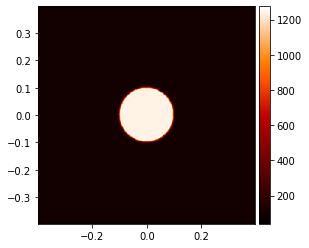

In [37]:
viz = plonk.visualize.render(snap=snap, quantity='density')

In [43]:
rotation_angle = np.pi / 2.
rotation_vector = np.array([0, 1, 0])
rotation_vector = rotation_vector / np.linalg.norm(rotation_vector)
rotation = Rotation.from_rotvec(rotation_angle * rotation_vector)

In [44]:
snap.rotate(rotation)

<plonk.Snap>

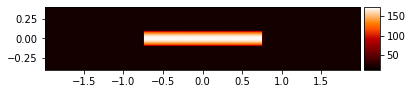

In [51]:
plonk.visualize.render(snap, quantity='rho')
plt.show()

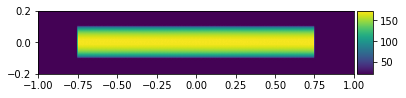

In [61]:
viz = plonk.visualize.plot(
    scalar_data=snap['density'],
#     vector_data=snap['velocity'][:, 0::2],
    x_coordinate=snap['position'][:, 0],
    y_coordinate=snap['position'][:, 2],
    z_coordinate=snap['position'][:, 1],
    extent=(-1, 1, -0.2, 0.2),
    particle_mass=snap['m'],
    smoothing_length=snap['h'],
    hfact=snap.properties['hfact'],
    scalar_options={'cmap': 'viridis'},
#     vector_options={'vector_color': 'white'},
#     interpolation_options={'cross_section': planet[1]},
    )